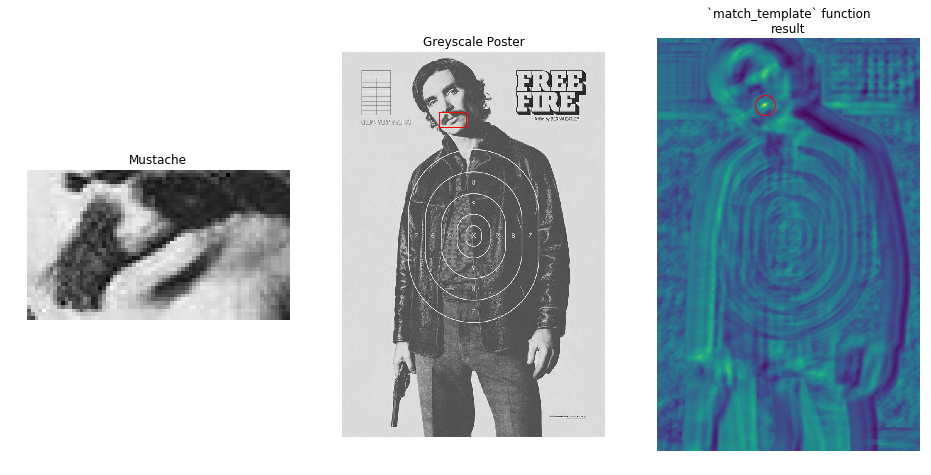

In [26]:
# task: test the match_template function on a selfie (here i took movie poster because of lack of a good camera)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from skimage import data
from skimage.feature import match_template

im = img.imread('free-fire-poster-12.jpg')

# reduced the number of dimensions for picture (turned it greyscale)

imagePoster = np.mean(im, -1)

# cropping the mustache

mustache = imagePoster[155:195, 250:320]
result = match_template(imagePoster, mustache)

ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

fig = plt.figure(figsize=(16, 10))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2) # , adjustable='box-forced'
ax3 = plt.subplot(1, 3, 3) # , sharex=ax2, sharey=ax2, adjustable='box-forced'

ax1.imshow(mustache, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('Mustache')

ax2.imshow(imagePoster, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('Greyscale Poster')

hmustache, wmustache = mustache.shape
rect = plt.Rectangle((x, y), wmustache, hmustache, edgecolor='r', facecolor='none')

ax2.add_patch(rect)
ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template` function\nresult')

ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=20)

plt.show()